In [2]:
!kaggle datasets download -d jessicali9530/stanford-dogs-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset
License(s): other
100% 748M/750M [00:09<00:00, 188MB/s]
100% 750M/750M [00:09<00:00, 81.8MB/s]


In [3]:
!unzip stanford-dogs-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: images/Images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/Images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/Images/n02108089-bo

In [5]:
import os
import shutil
import random

data_dir = '/content/images/Images'
train_dir = '/content/train'
test_dir = '/content/test'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split data
for breed in os.listdir(data_dir):
    breed_dir = os.path.join(data_dir, breed)
    if os.path.isdir(breed_dir):
        images = os.listdir(breed_dir)
        random.shuffle(images)
        split_point = int(len(images) * 0.8)  # 80% training, 20% testing

        train_images = images[:split_point]
        test_images = images[split_point:]

        os.makedirs(os.path.join(train_dir, breed), exist_ok=True)
        os.makedirs(os.path.join(test_dir, breed), exist_ok=True)

        for img in train_images:
            shutil.copy(os.path.join(breed_dir, img), os.path.join(train_dir, breed, img))

        for img in test_images:
            shutil.copy(os.path.join(breed_dir, img), os.path.join(test_dir, breed, img))


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report


Found 13172 images belonging to 120 classes.
Found 3246 images belonging to 120 classes.


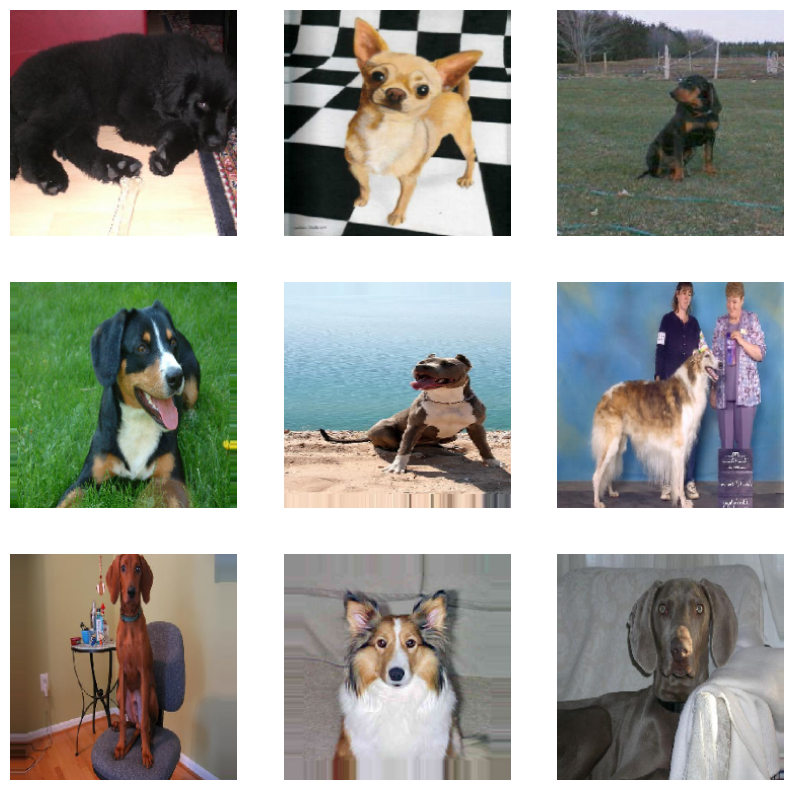

In [7]:
# Parameters
img_width, img_height = 224, 224
batch_size = 32
epochs = 25
num_classes = 120  # Jumlah jenis anjing
train_dir = '/content/train'
test_dir = '/content/test'

# EDA
def plot_sample_images(data_generator):
    sample_images, _ = next(data_generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(sample_images[i])
        plt.axis('off')
    plt.show()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # 20% data untuk validasi

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Data training

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Data validasi

# Plot sample images
plot_sample_images(train_generator)

In [9]:
# Model Building
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/25
411/411 [==============================] - 278s 674ms/step - loss: 4.8090 - accuracy: 0.0121 - val_loss: 4.7277 - val_accuracy: 0.0217
Epoch 2/25
411/411 [==============================] - 262s 638ms/step - loss: 4.6380 - accuracy: 0.0232 - val_loss: 4.5451 - val_accuracy: 0.0309
Epoch 3/25
411/411 [==============================] - 262s 637ms/step - loss: 4.4962 - accuracy: 0.0356 - val_loss: 4.4635 - val_accuracy: 0.0393
Epoch 4/25
411/411 [==============================] - 225s 546ms/step - loss: 4.3670 - accuracy: 0.0499 - val_loss: 4.3448 - val_accuracy: 0.0520
Epoch 5/25
411/411 [==============================] - 264s 642ms/step - loss: 4.2215 - accuracy: 0.0681 - val_loss: 4.2622 - val_accuracy: 0.0662
Epoch 6/25
411/411 [==============================] - 260s 634ms/step - loss: 4.0604 - accuracy: 0.0961 - val_loss: 4.2127 - val_accuracy: 0.0739
Epoch 7/25
411/411 [==============================] - 266s 647ms/step - loss: 3.9050 - accuracy: 0.1170 - val_loss: 4.1163 -

In [10]:
# Save Model
model.save('dog_breed_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
# Evaluasi Model
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

evaluation = model.evaluate(test_generator)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

Found 4162 images belonging to 120 classes.
131/131 [==============================] - 12s 90ms/step - loss: 4.7005 - accuracy: 0.1216
Test Loss: 4.700543403625488
Test Accuracy: 0.12157616764307022


131/131 [==============================] - 11s 84ms/step


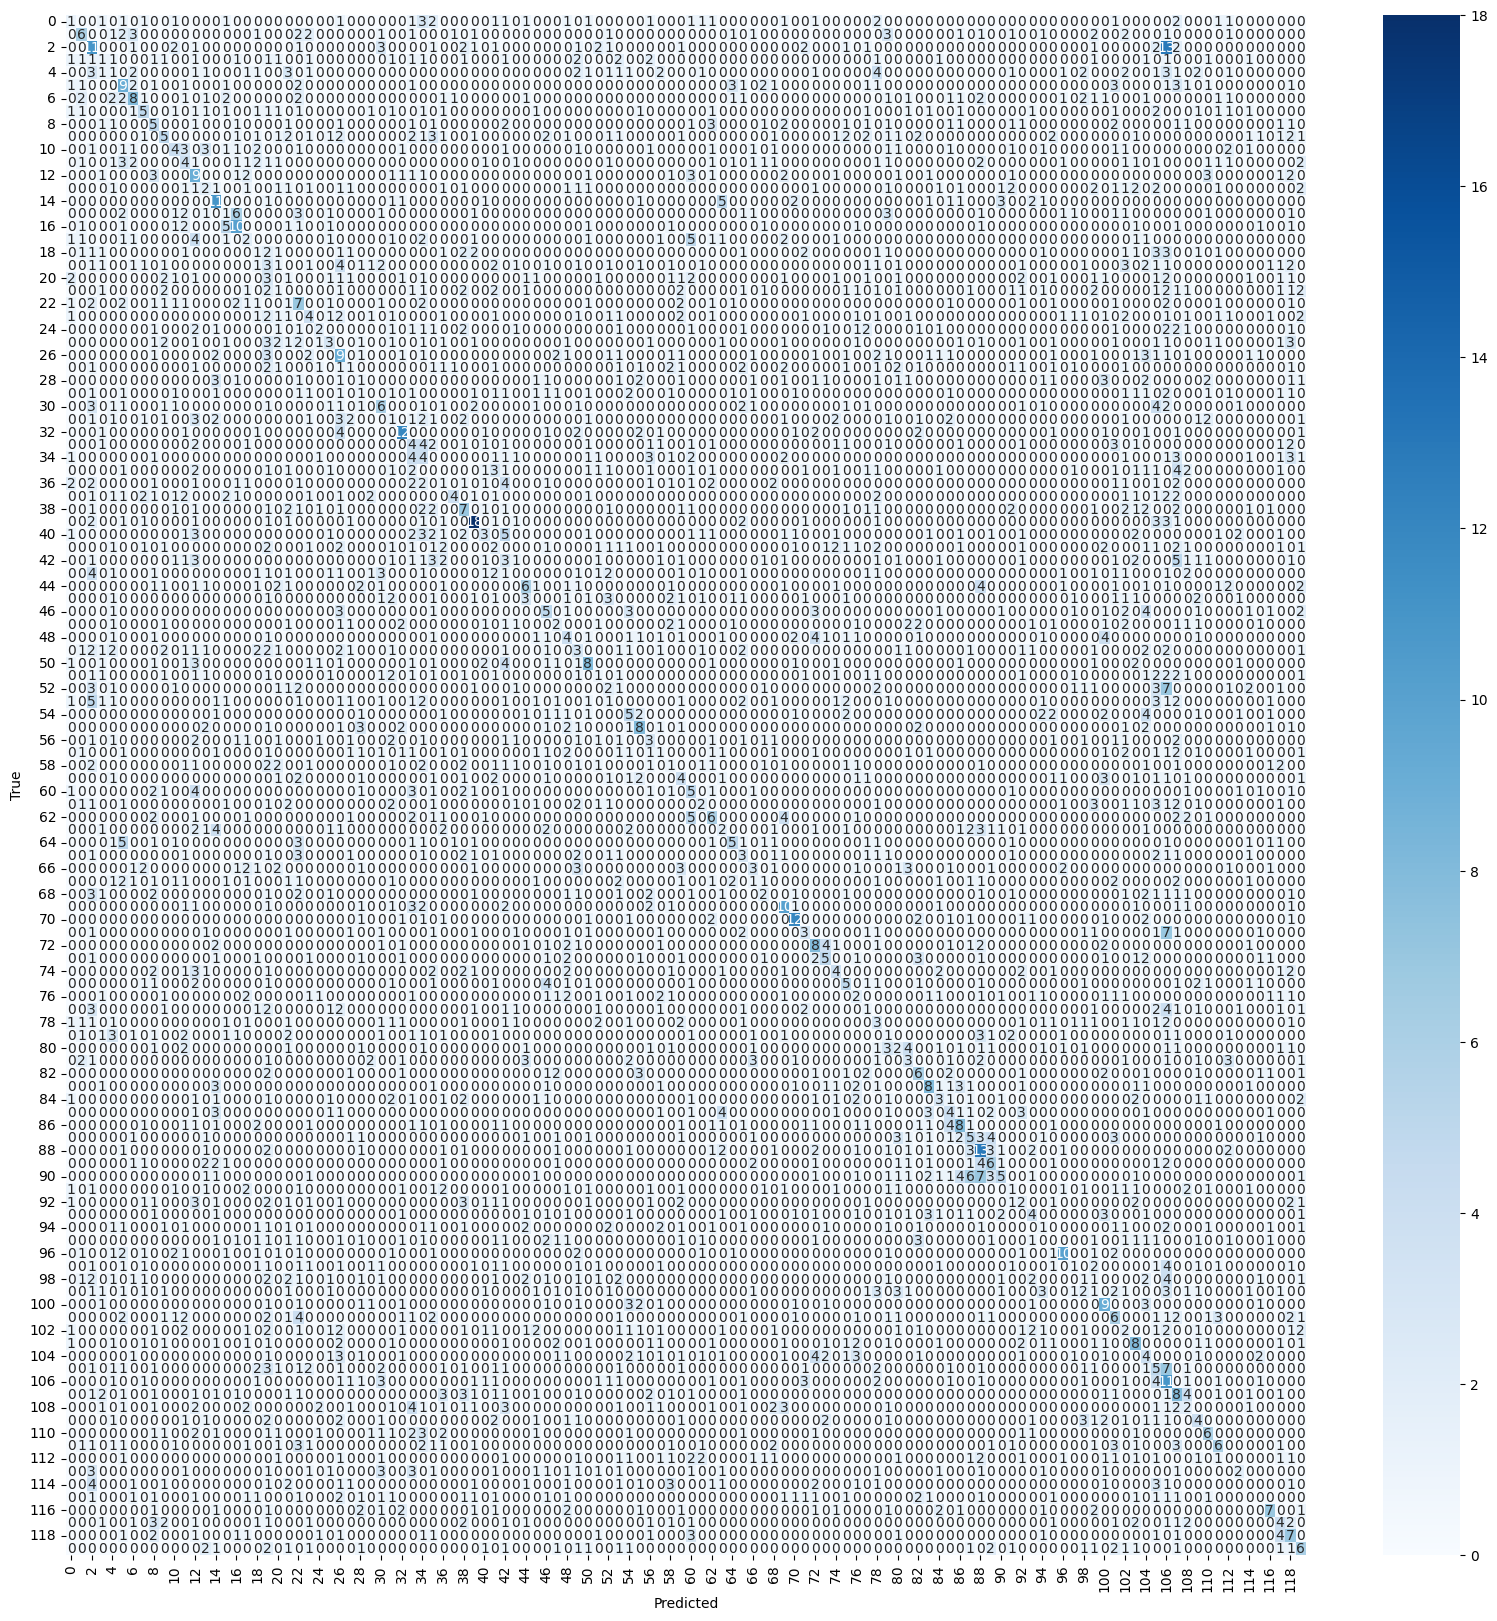

Classification Report
                                          precision    recall  f1-score   support

                     n02085620-Chihuahua       0.05      0.03      0.04        31
              n02085782-Japanese_spaniel       0.24      0.16      0.19        37
                   n02085936-Maltese_dog       0.14      0.22      0.17        51
                      n02086079-Pekinese       0.04      0.03      0.04        30
                      n02086240-Shih-Tzu       0.03      0.02      0.03        43
              n02086646-Blenheim_spaniel       0.17      0.24      0.20        38
                      n02086910-papillon       0.25      0.20      0.22        40
                   n02087046-toy_terrier       0.19      0.14      0.16        35
           n02087394-Rhodesian_ridgeback       0.10      0.14      0.12        35
                  n02088094-Afghan_hound       0.15      0.10      0.12        48
                        n02088238-basset       0.16      0.11      0.13    

In [12]:
# Predict
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=list(test_generator.class_indices.keys())))